In [66]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [46]:
max_feature = 10000
max_len =100
batch_szie= 32 

In [47]:
print('loading data..')
(input_train , y_train),(input_test , y_test) = imdb.load_data(num_words = max_feature)
input_train = sequence.pad_sequences(input_train , maxlen = max_len)
input_test = sequence.pad_sequences(input_test , maxlen = max_len)

loading data..


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Flatten
model = Sequential()
model.add(Embedding(max_feature, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation ='sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy' , metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model.fit(input_train , y_train , epochs = 10 , batch_size = 128, validation_split = 0.2 )

/Users/pankaj/anaconda/envs/ML2/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 246us/step - loss: 0.5845 - acc: 0.6758 - val_loss: 0.4932 - val_acc: 0.7720
Epoch 2/10
20000/20000 [==============================] - 4s 223us/step - loss: 0.3647 - acc: 0.8483 - val_loss: 0.4881 - val_acc: 0.8070
Epoch 3/10
20000/20000 [==============================] - 5s 233us/step - loss: 0.2669 - acc: 0.8947 - val_loss: 0.3872 - val_acc: 0.8422
Epoch 4/10
20000/20000 [==============================] - 4s 217us/step - loss: 0.1990 - acc: 0.9261 - val_loss: 0.4216 - val_acc: 0.8084
Epoch 5/10
20000/20000 [==============================] - 5s 232us/step - loss: 0.1362 - acc: 0.9542 - val_loss: 0.4377 - val_acc: 0.8268
Epoch 6/10
20000/20000 [==============================] - 5s 233us/step - loss: 0.0838 - acc: 0.9728 - val_loss: 0.4946 - val_acc: 0.8288
Epoch 7/10
20000/20000 [==============================] - 5s 227us/step - loss: 0.0492 - acc: 0.9848 - val_loss: 0.5847 - v

In [18]:
histroy.history

{'val_loss': [0.5023671234607696,
  0.47424759130477906,
  0.40701571581363677,
  0.5388506012439728,
  0.5431484957695007,
  0.5580678084850311,
  0.7350546870231628,
  0.771526745891571,
  0.7689339844107628,
  0.8492324277639389],
 'val_acc': [0.7590000033378601,
  0.7811999917030334,
  0.8253999948501587,
  0.7662000060081482,
  0.8136000037193298,
  0.817799985408783,
  0.7558000087738037,
  0.7865999937057495,
  0.8073999881744385,
  0.7972000241279602],
 'loss': [0.6322480319976806,
  0.3876447949886322,
  0.2697263744115829,
  0.18023547358512879,
  0.10437896797657013,
  0.053442117583751676,
  0.026747351345419883,
  0.015434078884124756,
  0.008479502806067466,
  0.0055069083228707315],
 'acc': [0.6275,
  0.83595,
  0.89265,
  0.9334,
  0.966,
  0.9851,
  0.9934,
  0.99575,
  0.9981,
  0.99855]}

In [23]:
import matplotlib.pyplot as plt

In [29]:
acc= histroy.history['loss']
val_acc= histroy.history['val_loss']

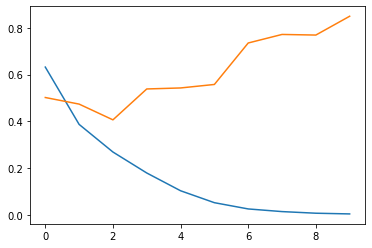

In [30]:
plt.plot(range(len(acc)), acc)
plt.plot(range(len(acc)), val_acc)

In [40]:
import numpy as np
model.predict(np.zeros((5,5)))

array([[0.99983525],
       [0.99983525],
       [0.99983525],
       [0.99983525],
       [0.99983525]], dtype=float32)

In [71]:
from tensorflow.keras.layers import LSTM

model2 = Sequential()
model2.add(Embedding(max_feature, 32))
model2.add(LSTM(32))
model2.add(Dense(1, activation ='sigmoid'))
model2.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy', metrics = ['acc'])
model2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [72]:
import tensorflow.keras
callbacks = [keras.callbacks.TensorBoard(log_dir = 'logs_lstm', histogram_freq= 1)]

history = model2.fit(input_train , y_train , epochs = 10, batch_size = 128 , validation_split = 0.2, 
                     callbacks= callbacks)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 13s 659us/sample - loss: 0.5089 - acc: 0.7549 - val_loss: 0.4410 - val_acc: 0.8084
Epoch 2/10
20000/20000 [==============================] - 10s 522us/sample - loss: 0.3121 - acc: 0.8727 - val_loss: 0.3584 - val_acc: 0.8454
Epoch 3/10
20000/20000 [==============================] - 10s 480us/sample - loss: 0.2564 - acc: 0.8983 - val_loss: 0.3494 - val_acc: 0.8462
Epoch 4/10
20000/20000 [==============================] - 9s 469us/sample - loss: 0.2224 - acc: 0.9149 - val_loss: 0.3763 - val_acc: 0.8358
Epoch 5/10
20000/20000 [==============================] - 10s 493us/sample - loss: 0.1999 - acc: 0.9245 - val_loss: 0.4325 - val_acc: 0.8340
Epoch 6/10
20000/20000 [==============================] - 10s 495us/sample - loss: 0.1817 - acc: 0.9352 - val_loss: 0.4414 - val_acc: 0.8224
Epoch 7/10
20000/20000 [==============================] - 9s 461us/sample - loss: 0.1594 - acc: 0.9437 - v

In [73]:
import os
PATH = os.getenv('PATH')
%env PATH=/Users/pankaj/anaconda/envs/ML2/bin:$PATH
%load_ext tensorboard
%tensorboard --logdir logs_lstm

env: PATH=/Users/pankaj/anaconda/envs/ML2/bin:/Users/pankaj/anaconda/envs/ML2/bin:/Users/pankaj/anaconda/condabin:/Users/pankaj/anaconda/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/opt/X11/bin
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 47364), started 0:12:28 ago. (Use '!kill 47364' to kill it.)